In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)


from astropy.io import ascii
from astropy.io import fits
from astropy.table import Table, Column, join
from astropy.wcs import WCS

In [2]:
# Plotting Parameters
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] =18
plt.rcParams['legend.fontsize'] = 16
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['axes.labelweight']='bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 5

In [3]:
# Reduced data in txt files
merged_dat_path = "A:/Documents/Grad_School/Research/IGRINS_Merged/"
fig_path = "A:/Documents/Grad_School/IGRINS-Spectra/IGRINS_figs/hops_spectra/"

# Create the folder if it doesn't exist
if not os.path.exists(fig_path):
    os.makedirs(fig_path)

In [4]:
merged_hops_files = glob.glob(merged_dat_path+"mHOPS*.txt")

In [5]:
# NIR Lines in micron
nir_dict = {
    "Fe-2.084": 2.084,
    "Si-2.092"	:	2.092,
    "Mg-2.106"	:	2.106,
    "Al-2.11"	:	2.11,
    "Ca-2.2035"	:	2.2035,
    "Fe-2.2037"	:	2.2037,
    "Sc-2.2052"	:	2.2052,
    "Na-2.2052"	:	2.2052,
    "Si-2.2063"	:	2.2063,
    "Sc-2.2065"	:	2.2065,
    "Si-2.2073"	:	2.2073,
    "Fe-2.2079"	:	2.2079,
    "Na-2.2083"	:	2.2083,
    "Ca-2.2113"	:	2.2113,
    "Ti-2.2218"	:	2.2218,
    "Ti-2.224"	:	2.224,
    "Fe-2.226"	:	2.226,
    "Ti-2.228"	:	2.228,
    "Ti-2.232"	:	2.232,
    "Ca-2.26573"	:	2.26573,
    "Fe-2.2742"	:	2.2742,
    "Mg-2.281"	:	2.281,
    "Ca-2.2825"	:	2.2825,
    "Fe-2.284"	:	2.284,
    "Ti-2.29"	:	2.29,
    "Ti-2.297"	:	2.297,
    "CO(2-0)-2.29353" :	2.29353,
    "CO(2-0)-2.32265"	:	2.32265,
    "CO(2-0)-2.34327" :	2.34327,
    "CO(2-0)-2.34531" :	2.34531,
    "CO(2-0)-2.3495" 	:	2.3495,
    "CO(2-0)-2.35167"	:	2.35167,
    "CO(2-0)-2.35246" :	2.35246,
    "CO(2-0)-2.38295" :	2.38295,
}

# Strings of the Nir lines
lines_str = list(nir_dict.keys())

# Wavelength values for each NIR line
lines_wav = list(nir_dict.values())

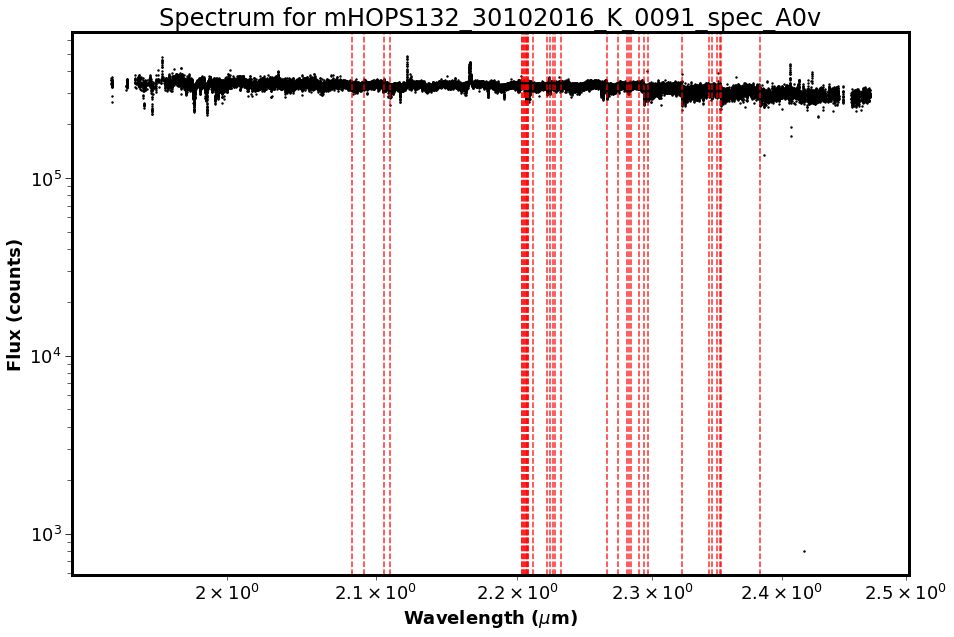

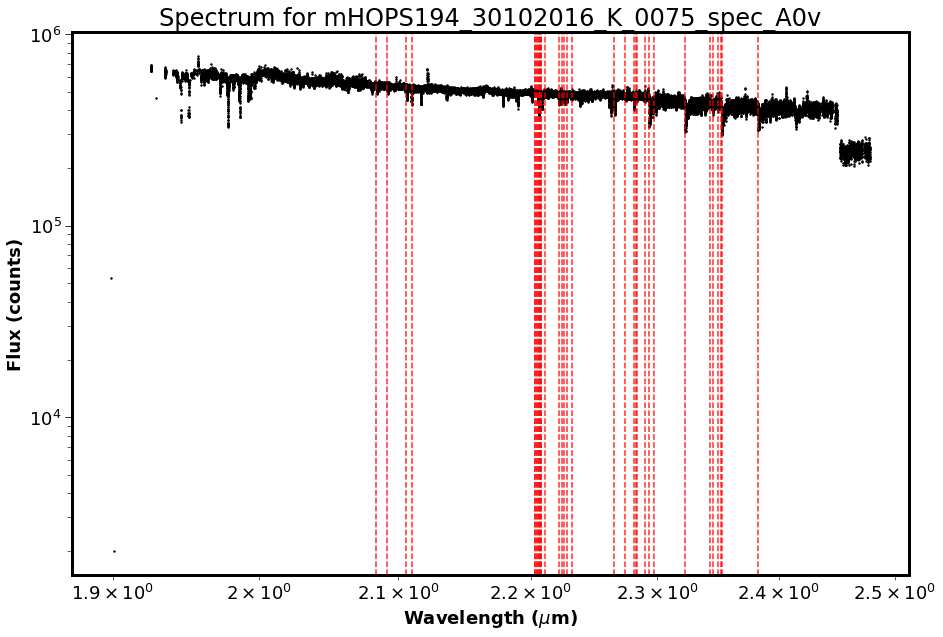

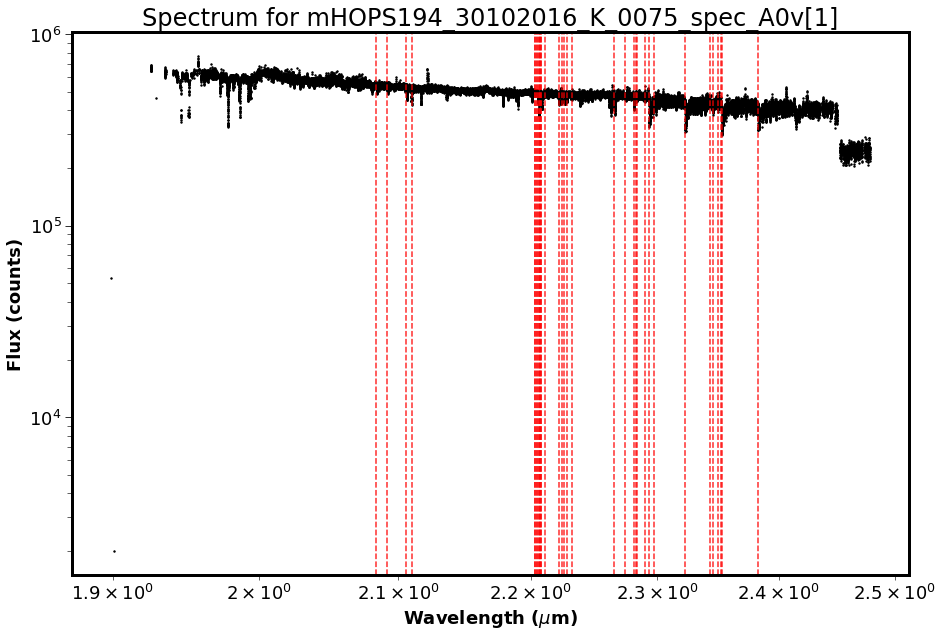

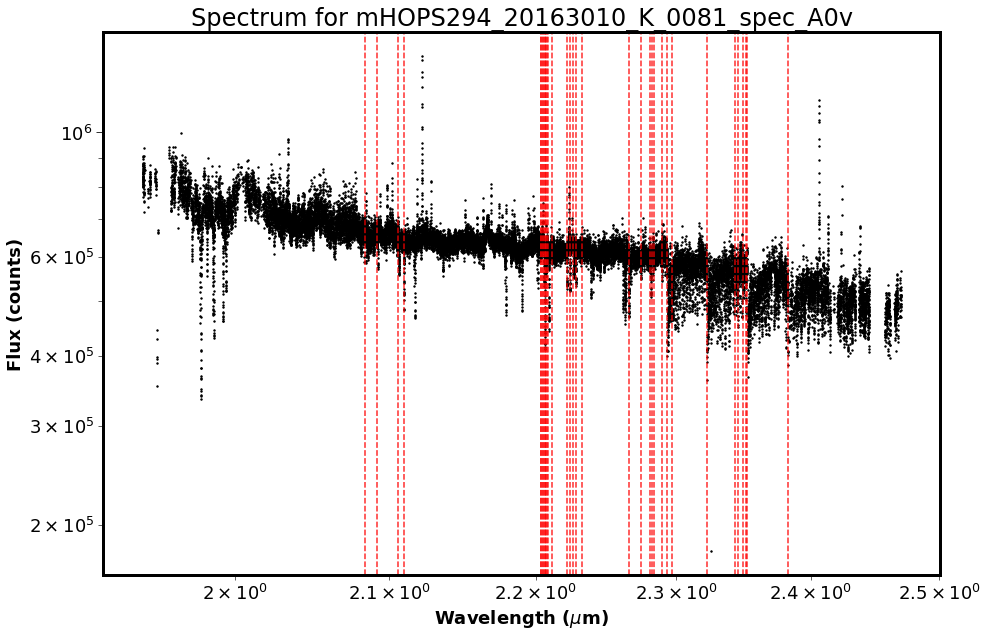

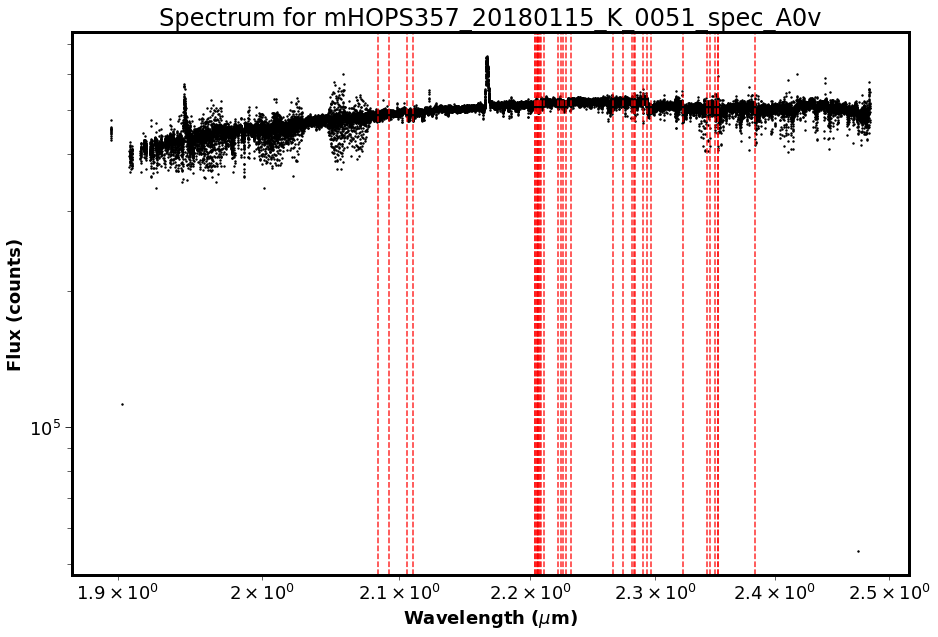

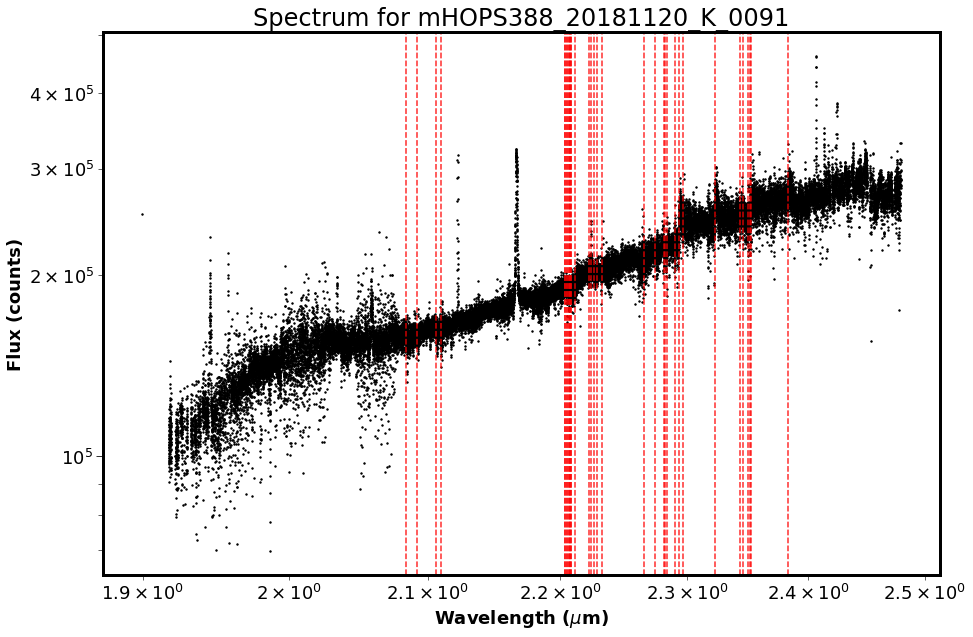

In [11]:
n = len(merged_hops_files)
for file in merged_hops_files:
    # Read the data from the TXT file using pandas
    df = pd.read_csv(file, delimiter='\s+', comment='#', header=None)  # Adjust delimiter if necessary
    # For some weird reason column 3 has dtype 'object' so I change it to 'float64'
    df[2] = df[2].astype(float)
    # Exclude any negative flux, anything with  10000 < SNR < 5 only because I don't actually know what the 3rd column is
    df = df[(df[1] > 0) & (df[2] >= 5) & (df[2] <= 10000)]
    # Extract wavelength and flux columns
    wavelength = df[0]
    flux = df[1]

    # Create a plot of wavelength vs. flux
    fig,ax = plt.subplots(figsize=(15,10))

    # ax.plot(wavelength, flux,c='black')
    ax.scatter(wavelength, flux,s=2,c='black')

    # Loop through NIR line dictionary and plot vertical, dashed lines at those wavelengths
    # Iterate over number of objects
    for i in range(n):
        # Iterate over the NIR dictionary
        for ii in range(len(lines_wav)):
            ax.axvline(x=lines_wav[ii],ls='dashed',color='red',alpha=0.2)
            # ax.set_xscale('log')
            # ax.set_yscale('log')
            
    # ax.set_xlim(2.1,2.24)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel('Wavelength ($\mu$m)')
    ax.set_ylabel('Flux (counts)')

    # Extract the filename from the path
    filename = os.path.splitext(os.path.basename(file))[0]
    # Make the title according to the filename
    ax.set_title('Spectrum for {}'.format(filename))
    
    # Save the plot as PNG
    plt.savefig(fig_path+'{}.png'.format(filename))
    # Show the plot
    plt.show()
    # Don't show the plots, save me some scrolling time and I can always look at them in the file explorer
    # plt.close()